Loading processed/MoNA.parquet ...
✅ Loaded successfully. Shape: (9680, 24) (Rows, Columns)

--- 1. Data Type Check ---
Spectrum column type: <class 'numpy.ndarray'>
Spectrum array shape: (2001,)
Spectrum value range: Min=0.0000, Max=1.0000
✅ Normalization check: Passed (Max <= 1.0)

--- 2. Missing Value Check ---
✅ No missing values found.

Columns in the DataFrame:
- entry_id
- smiles
- inchikey
- spectrum
- num_O
- num_N
- num_F
- has_C
- has_O
- has_N
- has_F
- has_H
- has_single
- has_double
- has_triple
- has_aromatic
- has_ring
- has_ether
- has_carbonyl
- has_alcohol
- has_amine
- has_cyano
- has_amide
- has_carboxylic

--- 3. Flag Statistics (Top 10 cols) ---
Flag prevalence (Sum):
num_O: 20540
has_C: 9675
has_H: 9636
has_single: 9615
has_O: 7526
has_double: 6723
has_ring: 6689
num_N: 5555
has_aromatic: 4879
has_carbonyl: 4816
has_ether: 4009
has_N: 3295
has_alcohol: 2883
has_amine: 1593
num_F: 840
has_carboxylic: 767
has_amide: 372
has_triple: 246
has_F: 243
has_cyano: 151

-

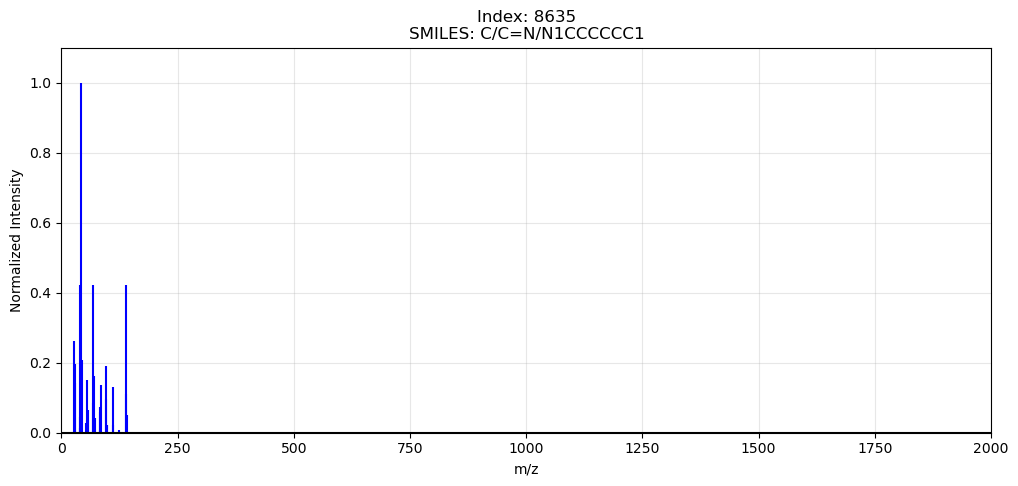

Displayed spectrum for Index 8635.
InChIKey: XLYFNXWSNVFHET-XNWCZRBMSA-N
Active Flags: ['num_N', 'has_C', 'has_N', 'has_H', 'has_single', 'has_double', 'has_ring', 'has_amine'] ... (Total 8)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# ノートブック内でのプロット表示用
%matplotlib inline

# ファイルパス (作成したファイル名に合わせてください)
PARQUET_FILE = "processed/MoNA.parquet"

def inspect_parquet_data(file_path):
    print(f"Loading {file_path} ...")
    
    # 1. 読み込み
    try:
        df = pd.read_parquet(file_path)
    except Exception as e:
        print(f"Error loading file: {e}")
        return

    print(f"✅ Loaded successfully. Shape: {df.shape} (Rows, Columns)")
    
    # 2. データ型の確認 (特にspectrum列)
    print("\n--- 1. Data Type Check ---")
    if 'spectrum' in df.columns:
        sample_spec = df.iloc[0]['spectrum']
        print(f"Spectrum column type: {type(sample_spec)}")
        
        if isinstance(sample_spec, np.ndarray):
            print(f"Spectrum array shape: {sample_spec.shape}")
            print(f"Spectrum value range: Min={sample_spec.min():.4f}, Max={sample_spec.max():.4f}")
            if sample_spec.max() <= 1.0:
                print("✅ Normalization check: Passed (Max <= 1.0)")
            else:
                print("⚠️ Warning: Spectrum values exceed 1.0")
        else:
            print("❌ Error: Spectrum is not a numpy array (probably loaded as list or string?)")
    else:
        print("❌ Error: 'spectrum' column not found.")

    # 3. 欠損値の確認
    print("\n--- 2. Missing Value Check ---")
    null_counts = df.isnull().sum()
    if null_counts.sum() == 0:
        print("✅ No missing values found.")
    else:
        print("⚠️ Missing values detected:")
        print(null_counts[null_counts > 0])
    
    # 各カラム名を表示
    print("\nColumns in the DataFrame:")
    for col in df.columns:
        print(f"- {col}")

    # 4. フラグ情報の統計 (すべて0になっていないか確認)
    print("\n--- 3. Flag Statistics (Top 10 cols) ---")
    # 'num_' または 'has_' で始まる列を抽出
    flag_cols = [c for c in df.columns if c.startswith('num_') or c.startswith('has_')]
    
    if flag_cols:
        # 平均値 (=発生率) を表示 -> 総和へ変更
        stats = df[flag_cols].sum().sort_values(ascending=False)
        print("Flag prevalence (Sum):")
        for col, val in stats.items():
            print(f"{col}: {val}")
        
        # 全て0の列がないかチェック
        zero_cols = [c for c in flag_cols if df[c].sum() == 0]
        if zero_cols:
            print(f"\n⚠️ Note: The following columns are all zeros: {zero_cols}")
    else:
        print("No flag columns found.")

    # 5. スペクトルの可視化
    print("\n--- 4. Visual Inspection (Random Sample) ---")
    idx = random.randint(0, len(df) - 1)
    row = df.iloc[idx]
    
    smiles = row['smiles']
    spec = row['spectrum']
    
    # m/z軸の作成 (配列のインデックスそのもの)
    mz_axis = np.arange(len(spec))
    
    plt.figure(figsize=(12, 5))
    
    # ステムプロット (MSの表示に適しています)
    # マーカーを消して線だけにする ('markerfmt=" "')
    plt.stem(mz_axis, spec, markerfmt=" ", basefmt="k-", linefmt='b-')
    
    plt.title(f"Index: {idx}\nSMILES: {smiles}")
    plt.xlabel("m/z")
    plt.ylabel("Normalized Intensity")
    plt.xlim(0, len(spec)) # 全範囲表示
    plt.ylim(0, 1.1)
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Displayed spectrum for Index {idx}.")
    print(f"InChIKey: {row.get('inchikey', 'N/A')}")
    # フラグの一部を表示
    active_flags = [c for c in flag_cols if row[c] > 0]
    print(f"Active Flags: {active_flags[:10]} ... (Total {len(active_flags)})")

# 実行
inspect_parquet_data(PARQUET_FILE)

```
Flag prevalence (Sum):
num_O: 20540
has_C: 9675
has_H: 9636
has_single: 9615
has_O: 7526
has_double: 6723
has_ring: 6689
num_N: 5555
has_aromatic: 4879
has_carbonyl: 4816
has_ether: 4009
has_N: 3295
has_alcohol: 2883
has_amine: 1593
num_F: 840
has_carboxylic: 767
has_amide: 372
has_triple: 246
has_F: 243
has_cyano: 151
```